In [128]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [129]:
with open('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/wyle0112-hS_N_.txt','r') as data :
    sample = data.read()
    
data.close()

In [130]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/platelist-v2_4_3.fits")

In [131]:
table_data = StringIO(sample)

In [132]:
# convert txt to csv and make dataframe
df = pd.read_csv(table_data, sep=',')

In [133]:
df

,mangaid,ra,dec,nsa_z,frac_spx,flag1,flag2
0,1-113521,317.38870,11.502920,0.135043,0.084025,False,0
1,1-113675,318.77560,10.098460,0.129881,0.146067,False,0
2,1-121532,118.09110,34.326570,0.139965,0.368421,True,4
3,1-121737,118.29130,35.932520,0.113369,1.055877,False,0
4,1-149270,168.30090,50.264590,0.115761,0.997324,False,0
5,1-156039,143.94070,49.023210,0.114699,1.033171,False,0
6,1-156158,144.47600,50.989100,0.138619,0.157040,False,0
7,1-167519,153.91470,44.656870,0.112397,0.644802,False,0
8,1-173904,166.15800,49.675790,0.114195,1.051478,False,0
9,1-180298,322.25310,0.182614,0.133437,0.005000,False,0


In [134]:
mangaid = np.array(df[[df.columns[0]]])

In [135]:
objlist = drpall_list[2].data

In [136]:
# Compare mangaid to from drp with sample list to get plateifu 

plateifu = {}
lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [137]:
index_i_want = [0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 30, 31, 32,
               33, 36, 37, 39, 41, 42, 43]
index_i_dont_want = [3, 9, 11, 12, 17, 20, 23, 27, 28, 29, 34, 35, 38, 40, 44]
len(index_i_dont_want), len(index_i_want)

(15, 30)

In [138]:
for i in index_i_dont_want: 
    plateifu.pop(df.loc[[i]]['mangaid'][i])

In [139]:
# plateifu

In [140]:
def filename(plateifu_id):
    objname = 'manga-'+plateifu_id+'-LOGCUBE.fits.gz'
    name = '/Volumes/WD_External/MaNGA_Sample_with_[OIII]/'+ objname
    filedata = fits.open(name)
    return filedata

In [141]:
def dataReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))
    return (flux, mask, wave, flux_header, ivar)

In [142]:
def fluxReader(plateifu_id):
    data = filename(plateifu_id)
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    return (flux, wave, flux_header)

In [144]:
def sumflux_calc(flux):
    n = len(flux)
    sumflux = np.zeros(4563)
    
    for i in range(n):
        for j in range(n):
            sumflux = np.add(sumflux, flux[i,j])
    return sumflux

In [221]:
def WholeFlux(plateifu_id, mangaid, z):
    flux, wave, flux_header = fluxReader(plateifu_id)
    
    wave_emit = wave/(1+z)

    sumflux = sumflux_calc(flux)
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1
    
    plt.figure(figsize = (20,5))
    plt.grid()
    plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.ylim(0,1000)
#     plt.xlim(5500, 5700)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave, sumflux, color = 'black')
#     plt.axvline(start, label = str(start), color = 'teal', linewidth = 2)
#     plt.axvline(end, label = str(end), color = 'teal', linewidth = 2)
    plt.legend()
    plt.savefig('Images/{}ObsFluxWhole.png'.format(mangaid))
    plt.show()
    
    plt.figure(figsize = (20,5))
    plt.grid()
    plt.xlabel('Emitted Wavelength ' + r'[$\AA$]')
    plt.ylabel('(Observed) Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.ylim(0,1000)
#     plt.xlim(4850, 5100)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
#     plt.axvline(start2, label = str(start2), color = 'magenta', linewidth = 2)
#     plt.axvline(end2, label = str(end2), color = 'magenta', linewidth = 2)
    plt.legend()
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave_emit, sumflux, color = 'darkgrey')
    plt.savefig('Images/{}EmitFluxWhole.png'.format(mangaid))
    plt.show()
    
    

In [204]:
def FluxGenerator(plateifu_id, mangaid, z):
    
    start = 5570
    end = 5585
    
    start2 = 4890
    end2 = 4910
    
    flux, wave, flux_header = fluxReader(plateifu_id)
    
    wave_emit = wave/(1+z)

    sumflux = sumflux_calc(flux)
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1
    
    plt.figure(figsize = (12,5))
    plt.grid()
    plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.xlim(5500, 5700)
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave, flux[x_center, y_center], color = 'turquoise', linewidth = 2, label = 'center') 
    plt.legend()
    plt.savefig('Images/{}CenFlux.png'.format(mangaid))
    plt.show()

            
    plt.figure(figsize = (12,5))
    plt.grid()
    plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.ylim(0,1000)
    plt.xlim(5500, 5700)
#     plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
#     plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave, sumflux, color = 'darkmagenta')
    plt.axvline(start, label = str(start), color = 'teal', linewidth = 2)
    plt.axvline(end, label = str(end), color = 'teal', linewidth = 2)
    plt.legend()
    plt.savefig('Images/{}ObsFlux.png'.format(mangaid))
    plt.show()
    

    plt.figure(figsize = (12,5))
    plt.grid()
    plt.xlabel('Emitted Wavelength ' + r'[$\AA$]')
    plt.ylabel('(Observed) Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.ylim(0,700)
    plt.xlim(4850, 5100)
    plt.axvline(5007, color = 'mediumseagreen', linewidth = 2, label = '5007')
    plt.axvline(4959, color = 'deepskyblue', linewidth = 2, label = '4959')
    plt.axvline(start2, label = str(start2), color = 'magenta', linewidth = 2)
    plt.axvline(end2, label = str(end2), color = 'magenta', linewidth = 2)
    plt.legend()
    plt.title('MaNGA ID = ' + mangaid)
    plt.plot(wave_emit, sumflux, color = 'tomato')
    plt.savefig('Images/{}EmitFlux.png'.format(mangaid))
    plt.show()


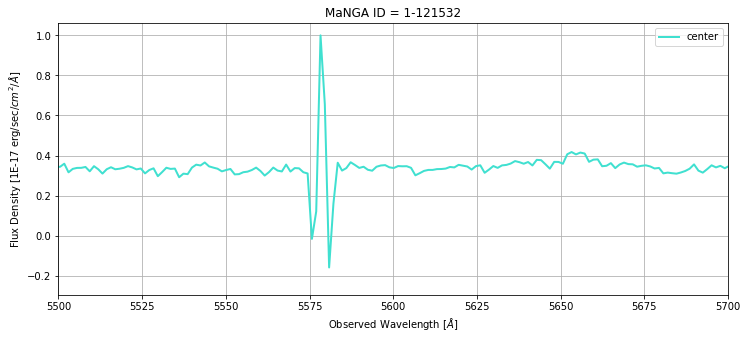

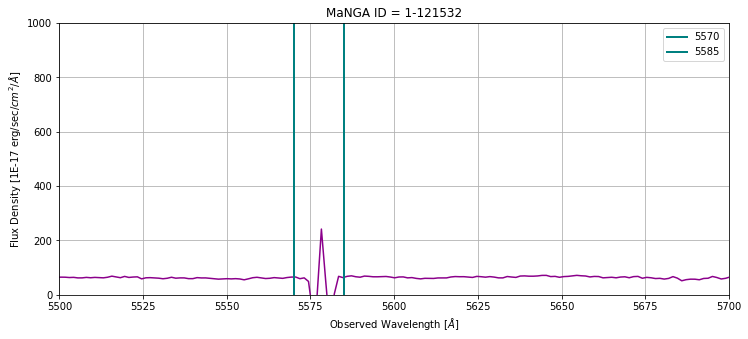

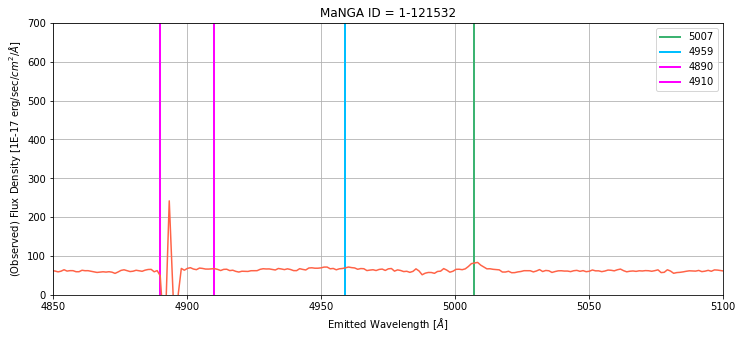

In [240]:
num = index_i_want[2]
FluxGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])

In [241]:
def imageGenerator(plateifu_id, mangaID, redshift):
    flux, mask, wave, flux_header, ivar = dataReader(plateifu_id)

    start = 5570
    end = 5585
    
#     start = 4900
#     end = 5100
    
#     x_center = int(flux_header['CRPIX1']) - 1
#     y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    ind_wave = np.where((wave / (1 + redshift) > start) & (wave / (1 + redshift) < end))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (7,7))
#     plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID + ' ($\lambda$ : ' + str(start) + ' - ' + str(end)  + ')')
    plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
    plt.plot()
    plt.savefig('Images/{}2DObsSelect.png'.format(mangaID))
#     plt.savefig('Images/demo_2d_13')

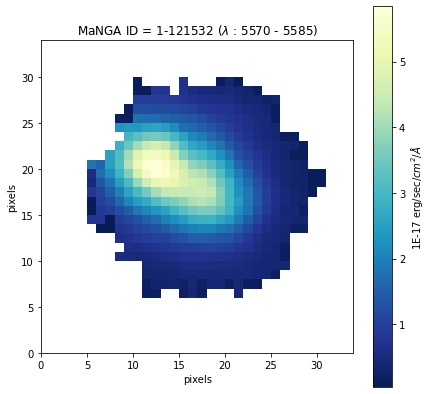

In [242]:
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

In [243]:
def imageGenerator(plateifu_id, mangaID, redshift):
    flux, mask, wave, flux_header, ivar = dataReader(plateifu_id)

#     start = 5570
#     end = 5590
    
    start = 4900
    end = 5100
    
#     x_center = int(flux_header['CRPIX1']) - 1
#     y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    ind_wave = np.where((wave / (1 + redshift) > start) & (wave / (1 + redshift) < end))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (7,7))
#     plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID + ' ($\lambda$ : ' + str(start) + ' - ' + str(end)  + ')')
    plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
    plt.plot()
    plt.savefig('Images/{}2DObs.png'.format(mangaID))
#     plt.savefig('Images/demo_2d_13')

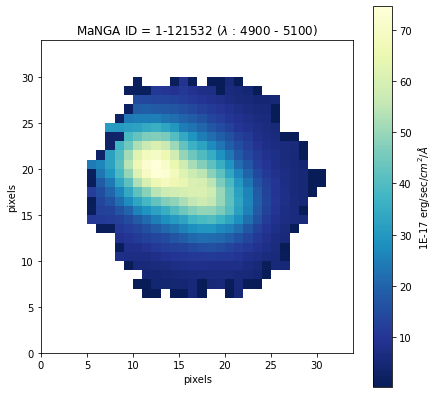

In [244]:
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

In [245]:
def imageGenerator(plateifu_id, mangaID, redshift):
    flux, mask, wave, flux_header, ivar = dataReader(plateifu_id)

#     start = 5570
#     end = 5590
    
    start = 4890
    end = 4910
    
#     x_center = int(flux_header['CRPIX1']) - 1
#     y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    ind_wave = np.where((wave / (1 + redshift) > start) & (wave / (1 + redshift) < end))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (7,7))
#     plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ' + mangaID + ' ($\lambda$ : ' + str(start) + ' - ' + str(end)  + ')')
    plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
    plt.plot()
    plt.savefig('Images/{}2DEmitSelect.png'.format(mangaID))
#     plt.savefig('Images/demo_2d_13')

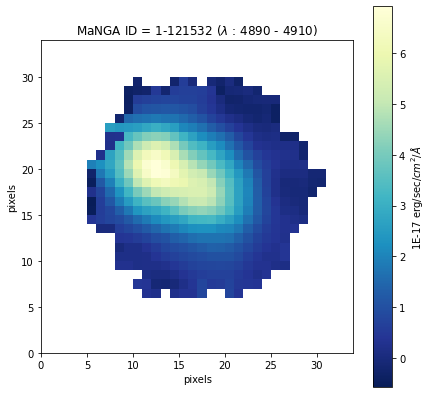

In [246]:
imageGenerator(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num] 
               ,df.loc[[num]]['nsa_z'][num])

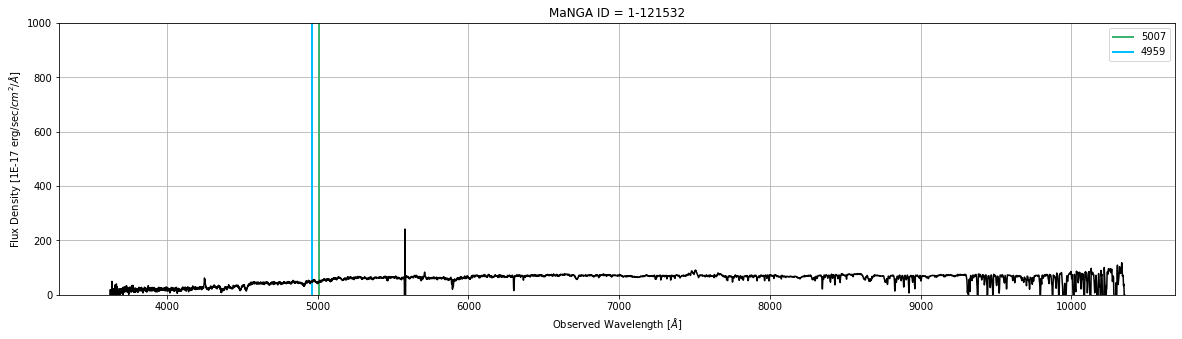

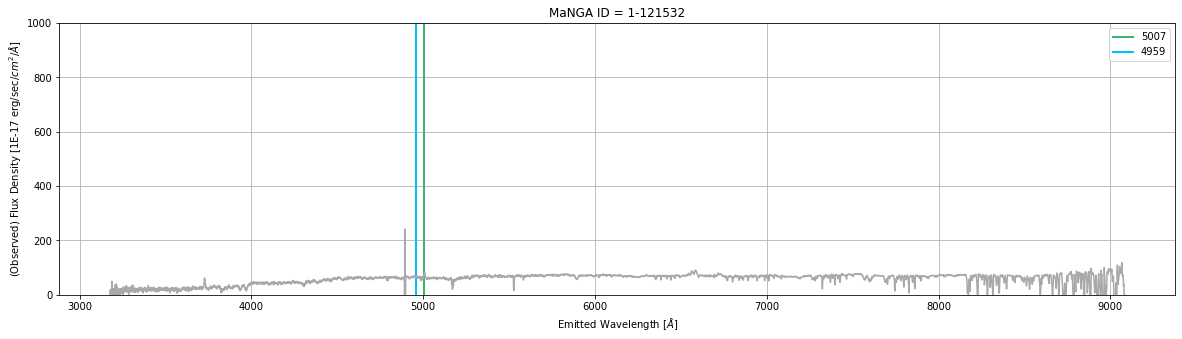

In [247]:
# num = index_i_want[0]
WholeFlux(plateifu[df.loc[[num]]['mangaid'][num]][0], df.loc[[num]]['mangaid'][num], 
              df.loc[[num]]['nsa_z'][num])